In [456]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('ggplot')

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999999)

In [473]:
fifa_data = pd.read_csv("fifa_player_data.csv")
display(fifa_data.head(3))
print(f"Shape: {fifa_data.shape}")

,id,full_name,nationality,positions,b_h_w,overall_rating,potential,value,wage,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi(ID: 158023),Lionel Andrés Messi Cuccittini,Argentina,"CF,RW,ST","Age 31 (Jun 24, 1987) 5'7"" 159lbs",94,94,€110.5M,€565K,Left,5,4,4,Medium/ Low,Messi,€226.5M,FC Barcelona,86.0,RW,10.0,"Jul 1, 2004",2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,C. Eriksen(ID: 190460),Christian Dannemann Eriksen,Denmark,"CAM,RM,CM","Age 26 (Feb 14, 1992) 5'11"" 168lbs",88,89,€69.5M,€205K,Right,3,5,4,High/ Medium,Lean,€133.8M,Tottenham Hotspur,83.0,LCM,23.0,"Aug 30, 2013",2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,P. Pogba(ID: 195864),Paul Pogba,France,"CM,CAM","Age 25 (Mar 15, 1993) 6'3"" 185lbs",88,91,€73M,€255K,Right,4,4,5,High/ Medium,Normal,€144.2M,Manchester United,82.0,LCM,6.0,"Aug 9, 2016",2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3


Shape: (17954, 88)


In [474]:
import re
import datetime


def clean_fifa(dataframe):
    # Copy the dataframe to another variable
    df = dataframe.copy()
    
    print("Starting cleanup...")

    
    # Split the id column to name and id
    print("Splitting the id column to name and id columns...")

    df['name'] = [x.split("(")[0].strip() for x in df.id.tolist()]
    df['id'] = [x.split("(")[1].replace(")", "").replace("ID: ", "") for x in df.id.tolist()]


    # Extract birth_date from b_h_w column
    print("Extracting 'birth_date' from b_h_w column...")
    time.sleep(1)
    df['birth_date'] = [x.split("(")[1].split(")")[0] for x in df['b_h_w']]
    df['birth_date'] = pd.to_datetime(df['birth_date'])     # convert to datetime type
    
    # Extract height from b_h_w
    print("Extracting height from b_h_w column and converting it to cm and name to 'height_cm'...")

    def clean_height(value):
        height = value.split(" ")[-2]
        foot = float(height[0])
        inch = float(height[-2])
        height_conv_to_cm = foot * 30.48 + inch * 2.54 
        return height_conv_to_cm
    df['height_cm'] = [clean_height(x) for x in df['b_h_w']]
    df['height_cm'] = df['height_cm'].astype(float)

    
    # Extract weight from b_h_w
    print("Extracting weight from b_h_w column and converting it to kgs and name to 'weight_kgs'...")

    df['weight'] = [x.split(" ")[-1] for x in df['b_h_w']]
    df['weight_lbs'] = [x.replace("lbs", "") for x in df['weight']]
    df['weight_kgs'] = [round(float(x)*0.45359237, 1) for x in df['weight_lbs']]

    
    # Calculate age
    print("Adding age column...")

    df['age'] = [(x - datetime.datetime.now()) for x in df['birth_date']]
    df['age'] = [int(abs(x.days) / 365.25) for x in df['age']]
    
    # function for cleaning the currencies
    def clean_currency(string):
        
        string = string[1:]
        
        if string.endswith("M"):
            x = string.replace("M", "")
            return float(x) * 1000000

        if string.endswith("K"):
            x = string.replace("K", "")
            return float(x) * 1000
        
    print("Cleaning and converting the rest...")
    
    # Converting columns to relative types
    df['club_join_date'] = pd.to_datetime(df['club_join_date'])
    df['club_jersey_number'] = pd.to_numeric(df['club_jersey_number'], errors='coerce')
    df['national_jersey_number'] = pd.to_numeric(df['national_jersey_number'], errors='coerce')
    
    # Cleaning the currency columns
    df[('value_euro')] = [clean_currency(x) for x in df['value']] 
    df['wage_euro'] = [clean_currency(x) for x in df['wage']]
    df['release_clause_euro'] = [clean_currency(x) for x in df['release_clause'].fillna("0")]
    
    # Place columns in df
    df = df[
        [
            'id', 'name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
            'positions', 'nationality',
            'overall_rating', 'potential', 'value_euro', 'wage_euro', 'preferred_foot',
            'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
            'work_rate', 'body_type', 
            'release_clause_euro', 'club_team', 'club_rating', 'club_position',
            'club_jersey_number', 'club_join_date', 'contract_end_year',
            'national_team', 'national_rating', 'national_team_position',
            'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
            'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
            'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
            'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
            'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
            'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
            'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
            'GK_positioning', 'GK_reflexes', 'tags', 'traits', 'LS', 'ST', 'RS', 'LW', 'LF',
            'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
            'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'
        ]
    ]

    
    print("\nData is now clean...!!!\n\n")
    
    return df

    


df = clean_fifa(fifa_data)
print(df.shape)
df.to_csv("fifa_cleaned.csv")

Starting cleanup...
Splitting the id column to name and id columns...
Extracting 'birth_date' from b_h_w column...
Extracting height from b_h_w column and converting it to cm and name to 'height_cm'...
Extracting weight from b_h_w column and converting it to kgs and name to 'weight_kgs'...
Adding age column...
Cleaning and converting the rest...

Data is now clean...!!!


(17954, 92)


---
---
# DATA ANALYSIS

In [475]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


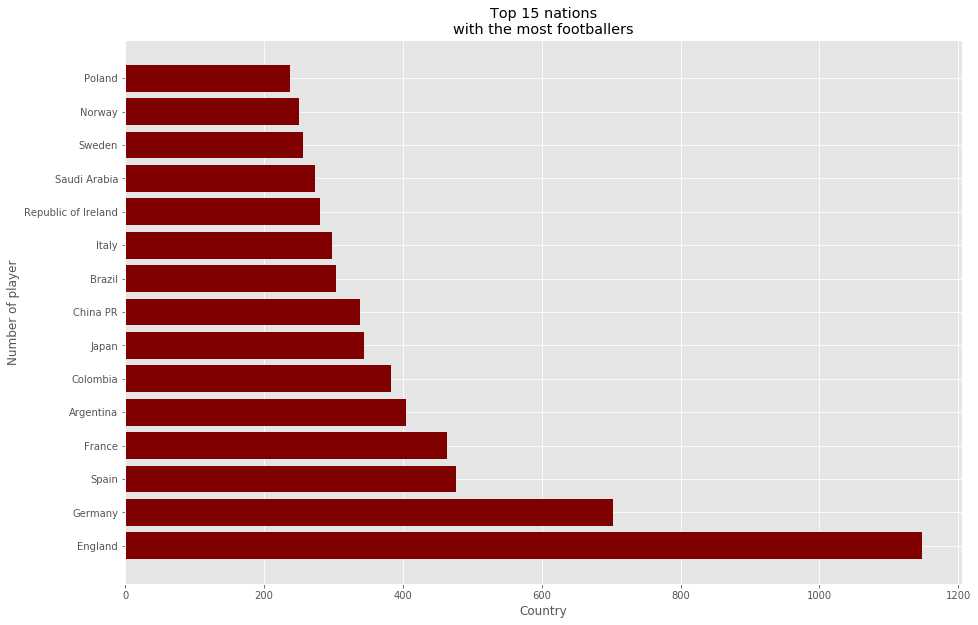

In [458]:
top = 15
nations = df['nationality'].value_counts()[:top].index.tolist()
counts = df['nationality'].value_counts()[:top].tolist()
plt.barh(nations, width=counts, color='maroon')
plt.title(f"Top {top} nations\nwith the most footballers")
plt.xlabel("Country")
plt.ylabel("Number of player")
plt.show()

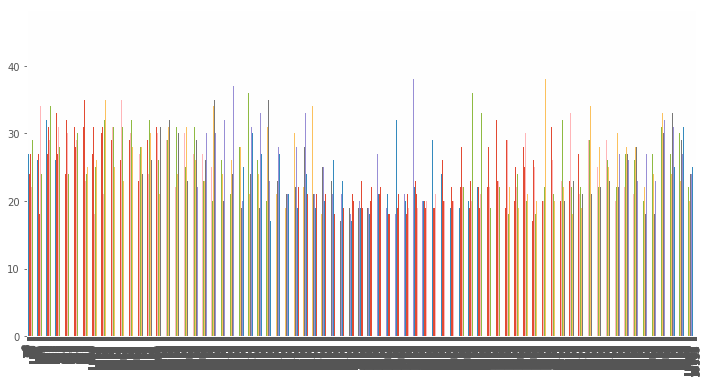

In [467]:
count, bin_edges = np.histogram(df['age'])

df['age'].plot(kind='bar', figsize=(12,6), xticks=bin_edges)
plt.show()